In [1]:
getwd()

[1] "/Users/millera2/millera2.github.io/CS-111"

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.4
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘purrr’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
counted2015 <- read_csv("../Data/counted2015.csv")
counted2016 <- read_csv("../Data/counted2016.csv")
counted <- rbind(counted2015, counted2016)

Parsed with column specification:
cols(
  uid = col_double(),
  name = col_character(),
  age = col_character(),
  gender = col_character(),
  raceethnicity = col_character(),
  armed = col_character(),
  month = col_character(),
  day = col_double(),
  year = col_double(),
  streetaddress = col_character(),
  city = col_character(),
  state = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  classification = col_character(),
  lawenforcementagency = col_character()
)

Parsed with column specification:
cols(
  uid = col_double(),
  name = col_character(),
  age = col_character(),
  gender = col_character(),
  raceethnicity = col_character(),
  armed = col_character(),
  month = col_character(),
  day = col_double(),
  year = col_double(),
  streetaddress = col_character(),
  city = col_character(),
  state = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  classification = col_character(),
  lawenforcementagency = col_character()
)



In [4]:
head(counted)

uid,name,age,gender,raceethnicity,armed,month,day,year,streetaddress,city,state,latitude,longitude,classification,lawenforcementagency
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2,Matthew Ajibade,22,Male,Black,No,January,1,2015,1050 Carl Griffin Dr,Savannah,GA,32.06669,-81.16788,Death in custody,Chatham County Sheriff's Office
4,Lewis Lembke,47,Male,White,Firearm,January,2,2015,4505 SW Masters Loop,Aloha,OR,45.48747,-122.89170,Gunshot,Washington County Sheriff's Office
5,Michael Kocher Jr,19,Male,White,No,January,3,2015,2600 Kaumualii Hwy,Kaumakani,HI,21.93335,-159.64197,Struck by vehicle,Kauai Police Department
6,John Quintero,23,Male,Hispanic/Latino,No,January,3,2015,500 North Oliver Ave,Wichita,KS,37.69380,-97.28055,Gunshot,Wichita Police Department
7,Tim Elliott,53,Male,Asian/Pacific Islander,Firearm,January,2,2015,600 E Island Lake Dr,Shelton,WA,47.24653,-123.11950,Gunshot,Mason County Sheriff's Office
8,Matthew Hoffman,32,Male,White,Non-lethal firearm,January,4,2015,630 Valencia St,San Francisco,CA,37.76285,-122.42200,Gunshot,San Francisco Police Department


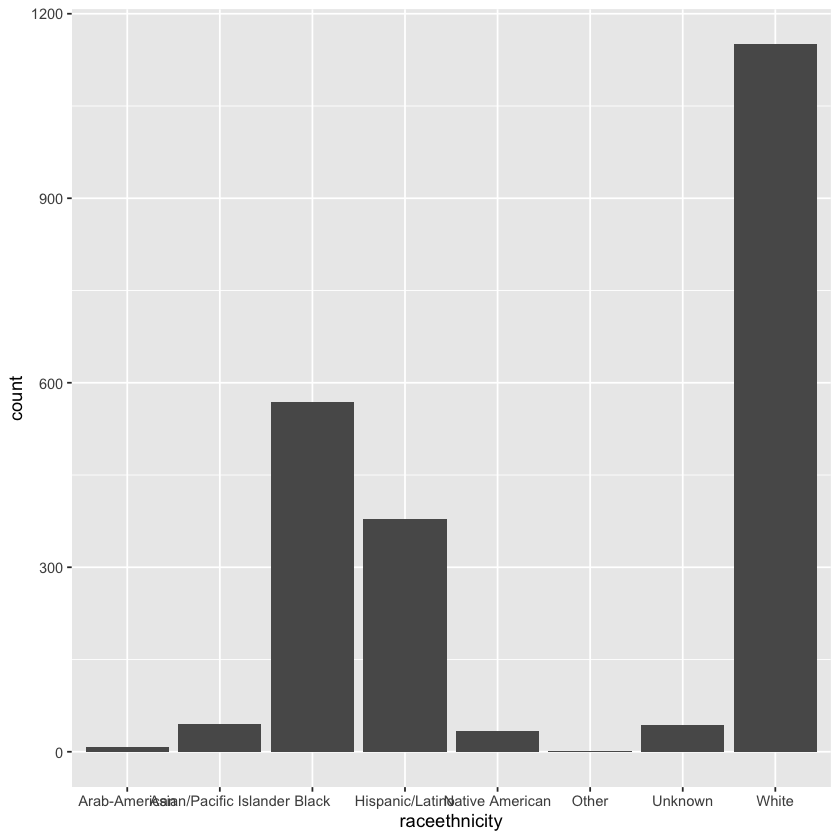

In [5]:
counted %>% ggplot(aes(raceethnicity))+geom_bar()

In [7]:
unarmed <- counted %>% filter(armed == "No") 

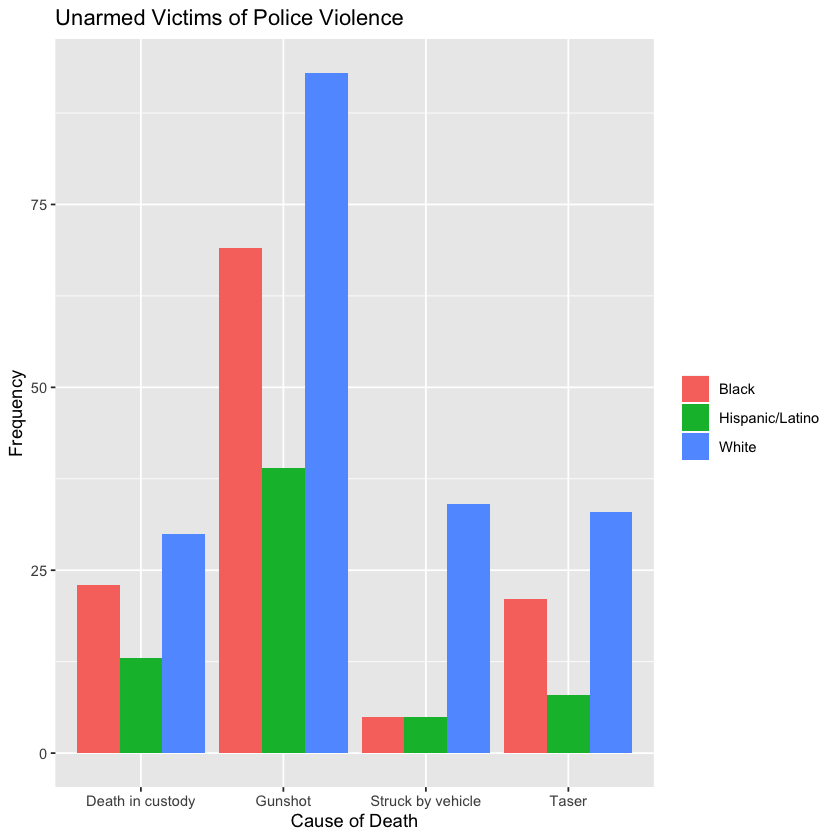

In [25]:
unarmed %>% filter(raceethnicity == "Black" | 
                   raceethnicity == "White" | 
                   raceethnicity == "Hispanic/Latino") %>% 
            filter(classification !="Other") %>%
            ggplot(aes(classification, fill=raceethnicity))+
                geom_bar(position="dodge") +
                labs(x = "Cause of Death", 
                     y="Frequency", 
                     title="Unarmed Victims of Police Violence")+
                theme(legend.title = element_blank())

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


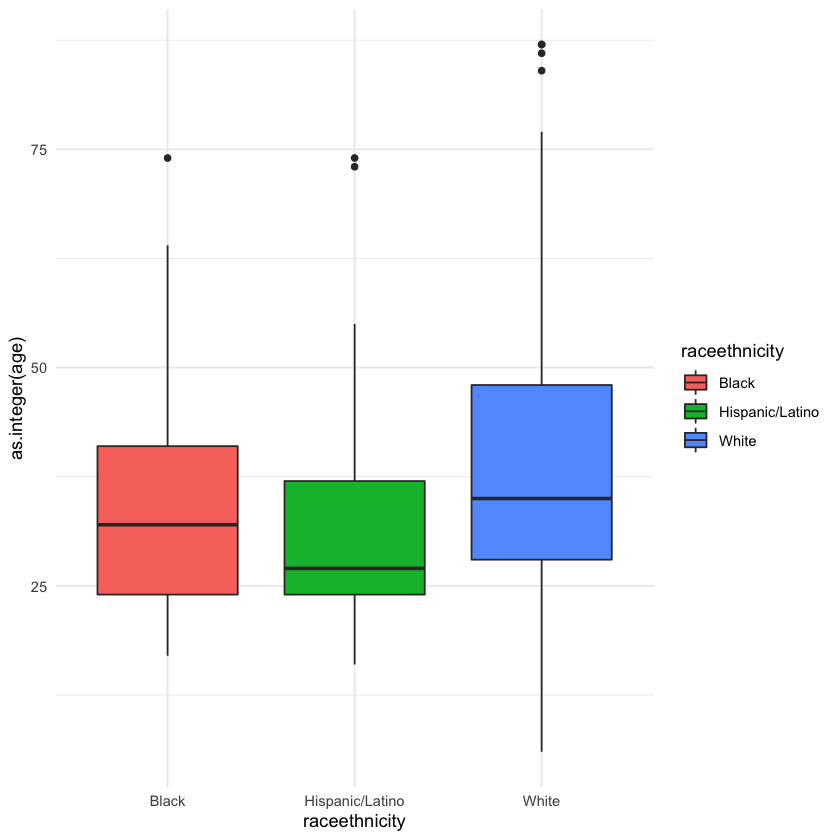

In [33]:
unarmed %>% filter(raceethnicity == "Black" | 
                   raceethnicity == "White" | 
                   raceethnicity == "Hispanic/Latino") %>% 
            ggplot(aes( raceethnicity, as.integer(age), fill=raceethnicity))+geom_boxplot()+theme_minimal()

Warning message:
“Removed 10 rows containing missing values (geom_point).”


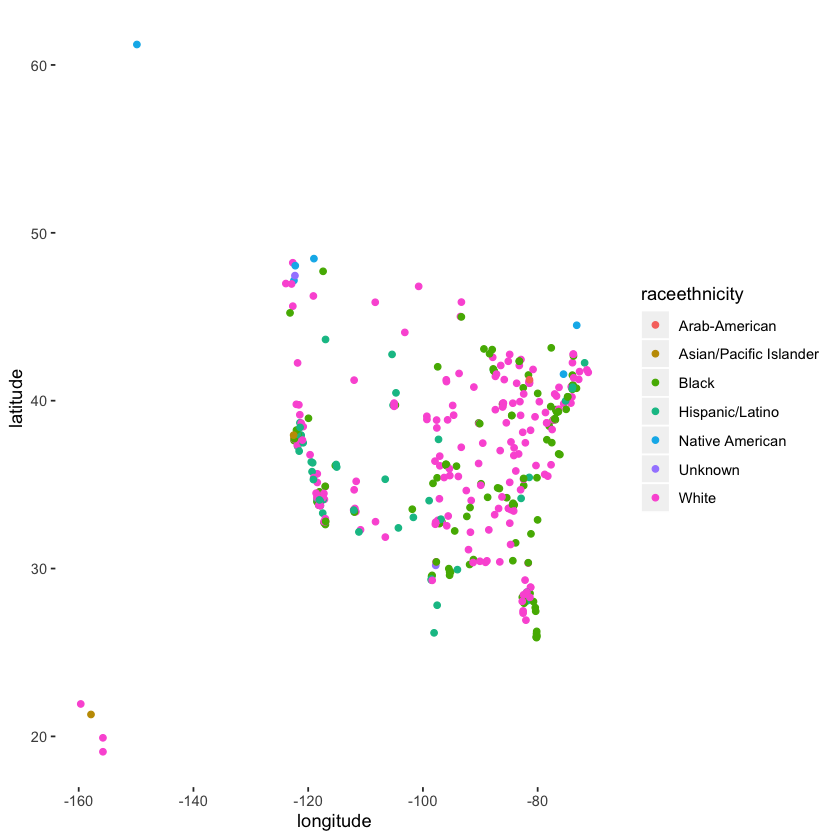

In [40]:
unarmed %>% ggplot(aes(longitude, latitude, color=raceethnicity))+geom_point() 